In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# EDA for scam profiles

In [9]:
scammers_df = pd.read_csv('../data/interim/scam_profiles.csv')
scammers_df.head()

,username,name,age,location,ethnicity,occupation,status,phone,inet,email,description,messages,justifications
0,fredJ,Fred Millestone,49,"San Diego, California, United States",white,military,–,–,178.238.213.161,fred.millestone@yahoo.com,"I am a simple and easy going man,I do not like...",hello beauty can we chat? add me fred.millesto...,IP is a proxy\nIP doesn’t correspond location\...
1,donald200,Donald Steve,46,Ireland,white,Self Employed,widowed,widowed,164.82.146.3,donaldsteve200@yahoo.com,"Am smart, organized, intelligent, honest, cari...","How are you doing,I’m Donald from Ireland… am ...",IP is a proxy\nIP doesn’t correspond location\...
2,huddleman,Peter,45,"Arlington, or Andrews, or Dallas, Texas, Unite...",white,military,widowed,widowed,69.115.19.232,frankiess8928@gmail.com,"I am sweet, thoughtful, kind, intelligent, and...",–,IP is a proxy\nIP doesn’t correspond location\...
3,jannycutelove,Jane Douglas,33,"Vancouver, Canada",white,student,single,single,67.191.26.153,janedouglas231@yahoo.com,"I am an attractive, physically and mentally he...",–,IP is a proxy\nIP doesn’t correspond location\...
4,Richardholdy,David Holdridge,47,"Bedford, Pennsylvania, United states",white,military,widowed,widowed,199.15.250.244,david_holdy@yahoo.com,"I am a loyal,friendly ,and always supportive ....",Its really a pleasure to hear from back from u...,IP is a proxy\nIP doesn’t correspond location\...


In [10]:
scammers_df.replace("–", np.nan, inplace=True)

In [11]:
scammers_df.describe()

,username,name,age,location,ethnicity,occupation,status,phone,inet,email,description,messages,justifications
count,3747,3747,3744,3747,3586,3451,3554,3558,3502,3745,3593,1735,3747
unique,3737,3603,266,1974,35,1049,32,191,3298,3734,3542,1722,2514
top,james,David,51,"New York, United States",white,military,single,single,widowed,lilian1988john@yahoo.com,"am a loving, caring and good looking man, i lo...",same as description,IP is a proxy\nIP doesn’t correspond location\...
freq,2,5,157,338,2469,375,1883,1794,11,2,3,3,205


In [12]:
scammers_df["username"].value_counts()

username
james                  2
wilson                 2
Lawrence               2
steven                 2
john                   2
                      ..
davidmckinney200030    1
honeybunch104          1
johnrensburg1          1
lorensseeking          1
Gabrielax              1
Name: count, Length: 3737, dtype: int64

In [13]:
scammers_df.notnull().sum()

username          3747
name              3747
age               3744
location          3747
ethnicity         3586
occupation        3451
status            3554
phone             3558
inet              3502
email             3745
description       3593
messages          1735
justifications    3747
dtype: int64

/home/javier/miniconda3/envs/dsa4263/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


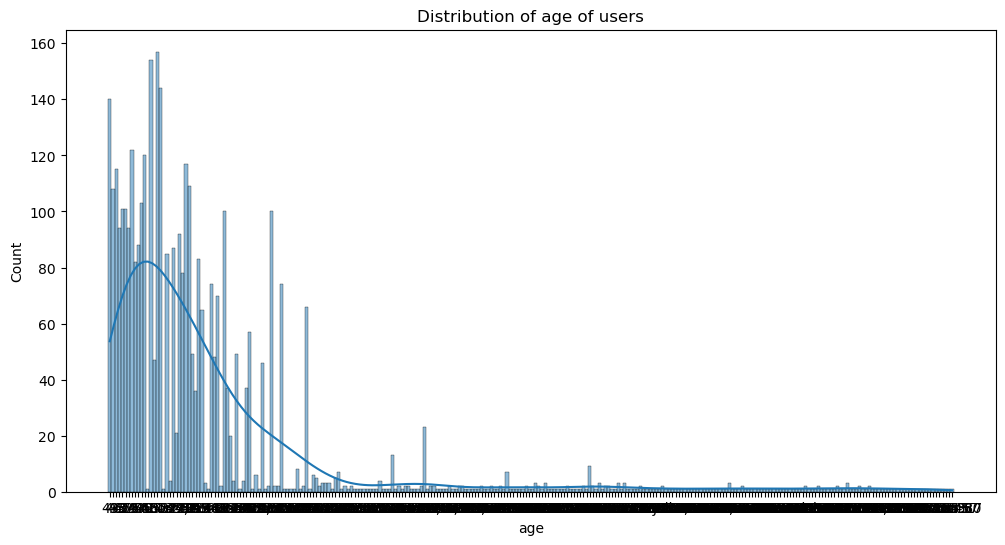

In [14]:
# plot distribution of age of users with seaborn
plt.figure(figsize=(12, 6))
sns.histplot(scammers_df["age"], bins=30, kde=True)
plt.title("Distribution of age of users")
plt.show()

In [15]:
scammers_df["age"].value_counts()

age
51          157
50          154
52          144
49          140
55          122
           ... 
45 or 59      1
40 or 22      1
35 or 41      1
27 or 29      1
54 or 60      1
Name: count, Length: 266, dtype: int64

Need to clean up age column

In [16]:
scammers_df["status"].value_counts()

status
single                                 1883
widowed                                1029
divorced                                527
separated                                28
Widowed                                  21
Divorced                                 14
widower                                  13
widow                                     9
married                                   4
divorce                                   3
single or divorced                        2
widowed or divorced                       1
seprated                                  1
married or divorced                       1
divorced or single                        1
window                                    1
singles                                   1
singlescammer’s real name: Olusegun       1
Signle                                    1
Separated                                 1
seperated                                 1
Widow                                     1
Widower                  

clean up status

In [17]:
sum(scammers_df["status"].value_counts() == 1)

21

## EDA for real profiles

In [18]:
real_df = pd.read_csv('../data/interim/real_profiles.csv')
real_df.replace("-", np.nan, inplace=True)
real_df.head()

,gender,age,location,status,username,ethnicity,occupation,description,match_age,children,orientation,religion,smoking,drinking,intent
0,male,50 y.o.,"East Chicago, IN, USA",widowed,Royer6873,hispanic,NaN,NaN,from 19 to 86,want children,Straight,Other,non-smoker,occasional drinker,Serious Relationship
1,female,42 y.o.,"Mykolaiv, Mykolaiv Oblast, Ukraine, 54000",single,uaola1981,white,NaN,NaN,from 19 to 75,no children,Straight,Other,non-smoker,social drinker,"Friendship, Romance, Serious Relationship, Mar..."
2,female,58 y.o.,"Tulsa, OK, USA",single,Dessarono55,black,Logistics,NaN,from 50 to 60,1-2 living elsewhere,Straight,Spiritual,non-smoker,social drinker,"Serious Relationship, Marriage"
3,male,60 y.o.,"Algiers [El Djazaïr], Algeria",single,maliktabib1964,white,NaN,NaN,from 19 to 50,no children,Straight,Muslim,non-smoker,never,Friendship
4,male,28 y.o.,"Santo Domingo de los Tsáchilas, Ecuador",single,Jaron26,hispanic,Ingeniero Agropecuario,NaN,from 25 to 30,no children,Straight,Christian,non-smoker,never,"Fun, Friendship, Romance, Serious Relationship..."


In [19]:
real_df.describe()

,gender,age,location,status,username,ethnicity,occupation,description,match_age,children,orientation,religion,smoking,drinking,intent
count,15395,15245,15394,15169,15395,15169,8970,3668,15394,15170,15169,15169,15169,15169,15394
unique,2,69,4680,6,14968,8,4235,3549,1077,7,3,8,4,4,31
top,male,43 y.o.,"Lima, Perú",single,Enrique42,hispanic,Estudiante,I am a fun and energetic guy. I’m a hard worke...,from 19 to 86,no children,Straight,Christian,non-smoker,social drinker,Serious Relationship
freq,10663,567,531,9534,2,6846,144,2,4577,6410,14597,7791,11293,6451,3436


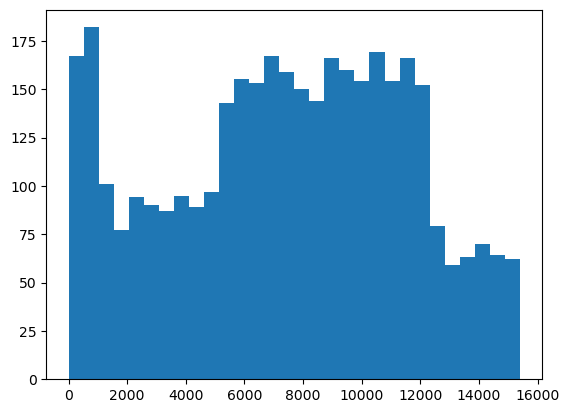

In [20]:
plt.hist(np.where(real_df["description"].notna())[0], bins=30)
plt.show()

In [21]:
real_df.notnull().sum()

gender         15395
age            15245
location       15394
status         15169
username       15395
ethnicity      15169
occupation      8970
description     3668
match_age      15394
children       15170
orientation    15169
religion       15169
smoking        15169
drinking       15169
intent         15394
dtype: int64

/home/javier/miniconda3/envs/dsa4263/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


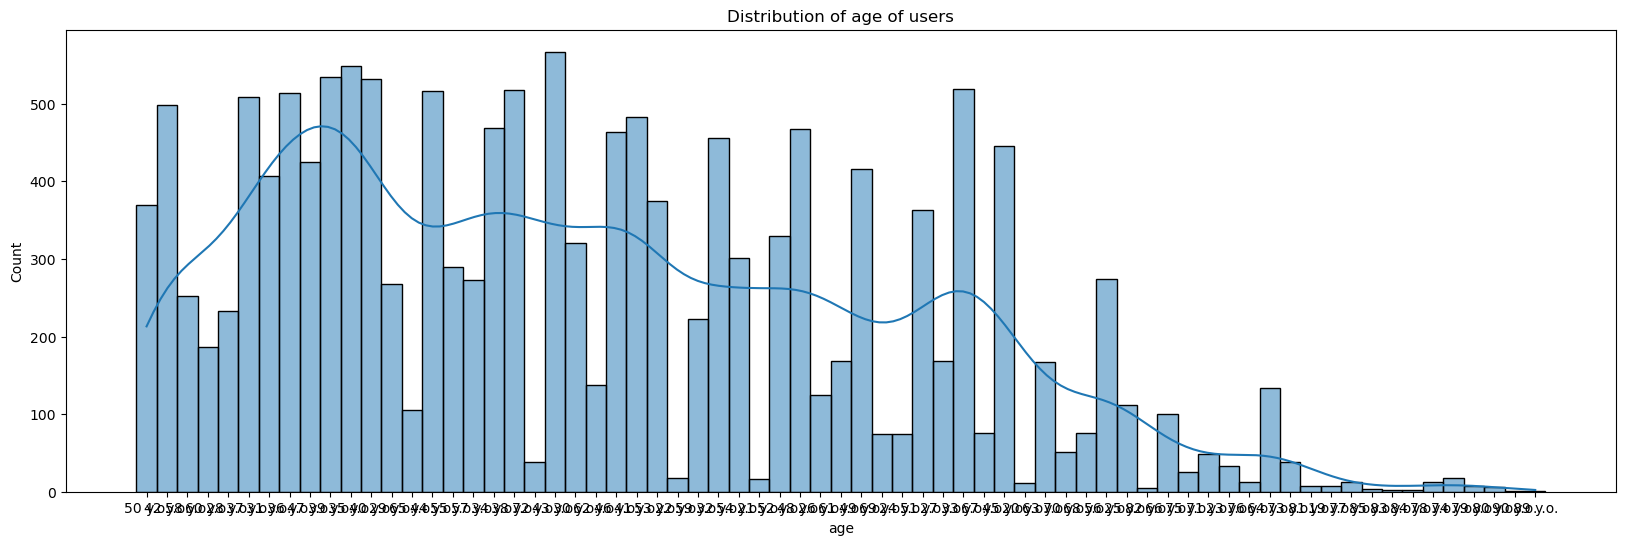

In [22]:
# plot distribution of age of users with seaborn
plt.figure(figsize=(20, 6))
sns.histplot(real_df["age"], bins=30, kde=True)
plt.title("Distribution of age of users")
plt.show()

In [23]:
real_df["age"].value_counts()

age
43 y.o.    567
35 y.o.    549
39 y.o.    535
40 y.o.    532
33 y.o.    519
          ... 
85 y.o.      4
84 y.o.      2
83 y.o.      2
90 y.o.      1
89 y.o.      1
Name: count, Length: 69, dtype: int64

Need to clean up age column

In [24]:
real_df["status"].value_counts()

status
single             9534
divorced           2946
separated          1784
widowed             438
in relationship     262
married             205
Name: count, dtype: int64

# Todo

- [ ] Clean up age feature
- [ ] Clean up status feature
- [ ] Drop phone feature (should we?)
- [ ] Drop inet feature (should we?)
- [ ] Drop messages feature (privacy concerns)
- [ ] Drop justification field